# ORIGINAL AUDIO PREPROCESSING

We only have 6 original samples, we need to preprocess these samples i.e.
- Noise filtering removal 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import librosa
import scipy.signal as signal
import soundfile as sf
import os

In [56]:
def plot_fft(signal):
    """
    Perform FFT on a given signal and plot the frequency spectrum.

    Parameters:
    - signal (numpy.ndarray): Input signal in the time domain.

    Returns:
    - None: Displays the FFT plot.
    """
    # Sampling Rate
    sampling_rate =44100

    # Number of samples in the signal
    N = len(signal)

    # Perform FFT
    fft_result = fft(signal)

    # Calculate frequencies corresponding to FFT result
    frequencies = fftfreq(N, d=1/sampling_rate)

    # Only keep the positive frequencies (real-world signals are symmetric)
    positive_freqs = frequencies[:N // 2]
    magnitude = np.abs(fft_result[:N // 2])

    # Plot the FFT result
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, magnitude, label="Magnitude")
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.legend()
    plt.show()

In [57]:
def compute_bode(signal):
    """
    Compute and display the Bode plot for a given signal.

    Parameters:
        signal (numpy.ndarray): The input signal.
    """

    # Sampling Rate
    sampling_rate =44100

    n = len(signal)
    freq = np.fft.rfftfreq(n, d=1/sampling_rate)  # Positive frequencies
    fft_values = np.fft.rfft(signal)  # Compute FFT for positive frequencies only

    # Magnitude and phase
    magnitude = np.abs(fft_values)
    phase = np.angle(fft_values, deg=True)  # Phase in degrees

    # Plotting
    plt.figure(figsize=(12, 8))

    # Magnitude plot (in dB)
    plt.subplot(2, 1, 1)
    plt.semilogx(freq, 20 * np.log10(magnitude + 1e-12), color='blue')  # Add a small offset to avoid log(0)
    plt.title("Bode Plot")
    plt.ylabel("Magnitude (dB)")
    plt.grid(which="both", linestyle="--", linewidth=0.5)

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq, phase, color='red')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (degrees)")
    plt.grid(which="both", linestyle="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()


In [58]:
# Function to create and apply a low-pass Butterworth filter
def butter_lowpass_filter(data, cutoff_freq, sample_rate, order=4):
    # Normalize the cutoff frequency with respect to Nyquist frequency
    nyquist = 0.5 * sample_rate
    normalized_cutoff = cutoff_freq / nyquist

    # Get the filter coefficients (b, a) for the Butterworth filter
    b, a = signal.butter(order, normalized_cutoff, btype='low', analog=False)

    # Apply the filter to the signal using filtfilt (zero-phase filtering)
    filtered_data = signal.filtfilt(b, a, data)

    return filtered_data

In [59]:
# Function to visualize the original and filtered signal
def plot_signals(original, filtered, sr):
    # Time axis for the signals
    t = np.arange(0, len(original)) / sr

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, original, label="Original Signal")
    plt.title("Original Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(2, 1, 2)
    plt.plot(t, filtered, label="Filtered Signal", color='r')
    plt.title("Filtered Signal (Low-pass Butterworth Filter)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

In [60]:
# Function to visualize the original and filtered signal
def plot_signals(original, filtered, sr):
    # Time axis for the signals
    t = np.arange(0, len(original)) / sr

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, original, label="Original Signal")
    plt.title("Original Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(2, 1, 2)
    plt.plot(t, filtered, label="Filtered Signal", color='r')
    plt.title("Filtered Signal (Low-pass Butterworth Filter)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

In [61]:
def clap_Analysis(audio_files,cutoff_frequency):
    filtered_signals=[]
    i=0
    for clap in audio_files:
        y, sr = librosa.load(clap, sr=None)
        plot_fft(y)

        # Apply the Butterworth low-pass filter
        filtered_signal = butter_lowpass_filter(y, cutoff_frequency, sr)
        filtered_signals.append(filtered_signal)

    # Create a new folder to store the generated audio files
    os.makedirs('../data/filtered_claps', exist_ok=True)

    # Convert and save all generated spectrograms to audio
    for  filtered_signal in filtered_signals:
        file_name = f"../data/filtered_claps/clap_{i + 1}.wav"
        sf.write(file_name, filtered_signal, 44100)  # Save as .wav file
        i=i+1

    print("Generated audio files are saved in the 'filtered_claps' folder.")

In [62]:
def echo_Analysis(audio_files,cutoff_frequency):
    filtered_signals=[]
    i=0
    for clap in audio_files:
        y, sr = librosa.load(clap, sr=None)
        plot_fft(y)

        # Apply the Butterworth low-pass filter
        filtered_signal = butter_lowpass_filter(y, cutoff_frequency, sr)
        filtered_signals.append(filtered_signal)
        plot_signals(y, filtered_signal, sr)

    # Create a new folder to store the generated audio files
    os.makedirs('../data/filtered_echoes', exist_ok=True)

    # Convert and save all generated spectrograms to audio
    for  filtered_signal in filtered_signals:
        file_name = f"../data/filtered_echoes/echo_{i + 1}.wav"
        sf.write(file_name, filtered_signal, 44100)  # Save as .wav file
        i=i+1

    print("Generated audio files are saved in the 'filtered_echoes' folder.")

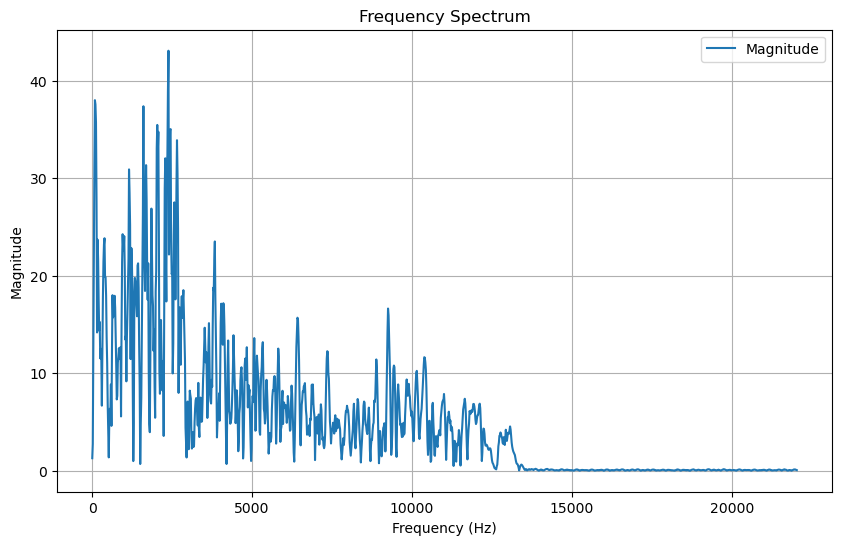

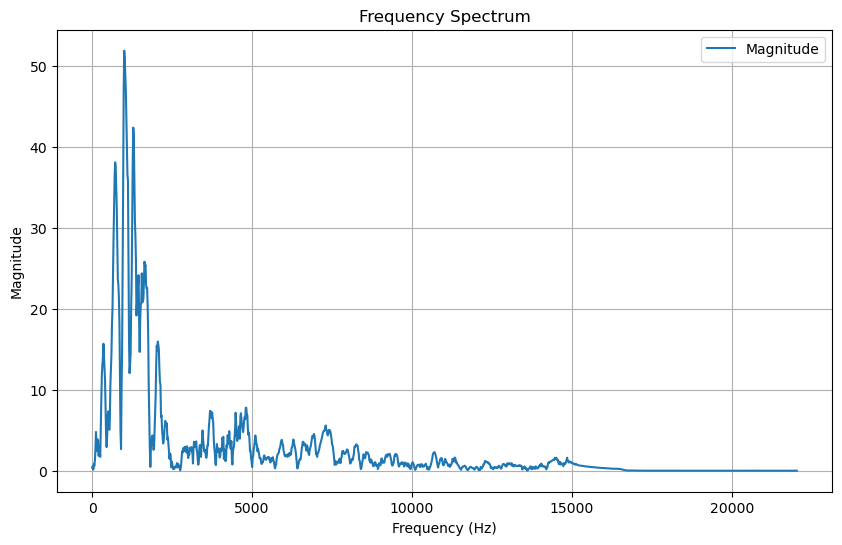

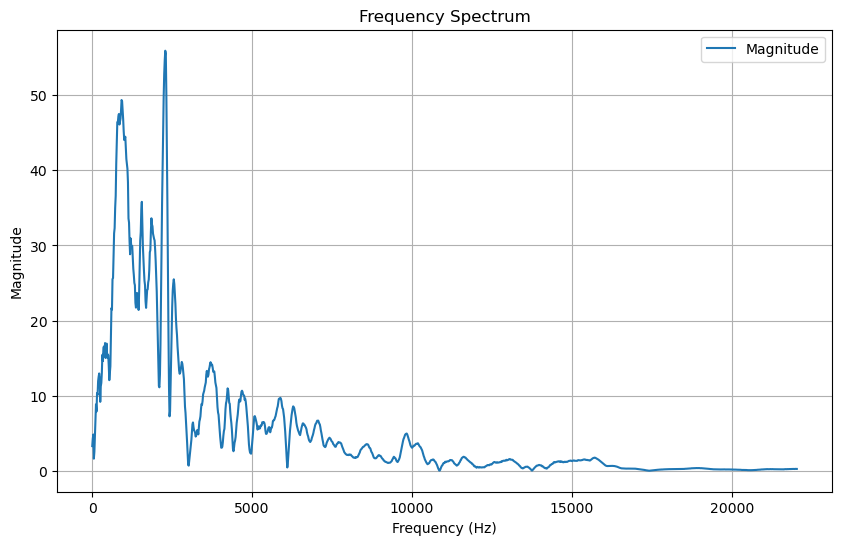

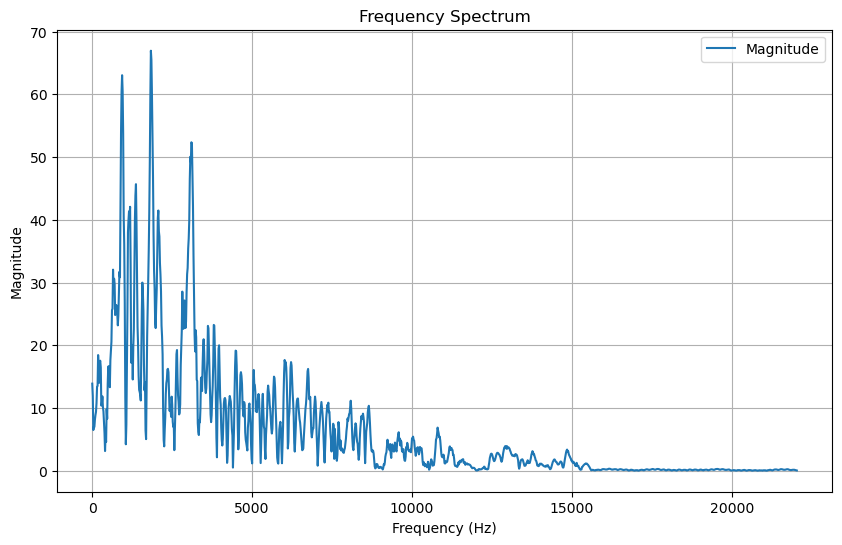

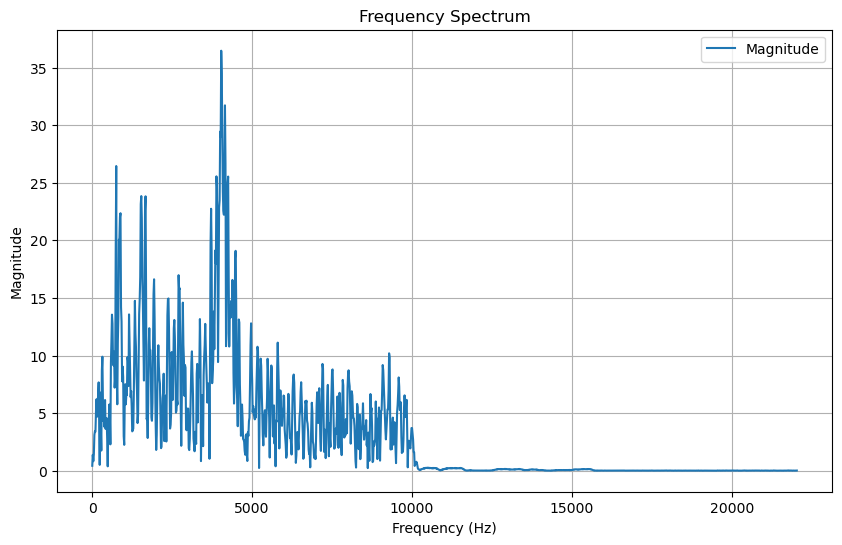

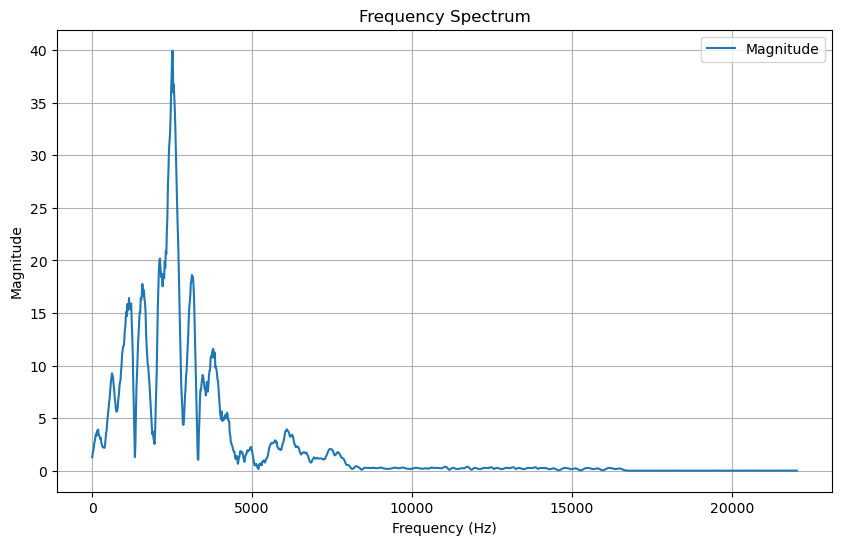

Generated audio files are saved in the 'filtered_claps' folder.


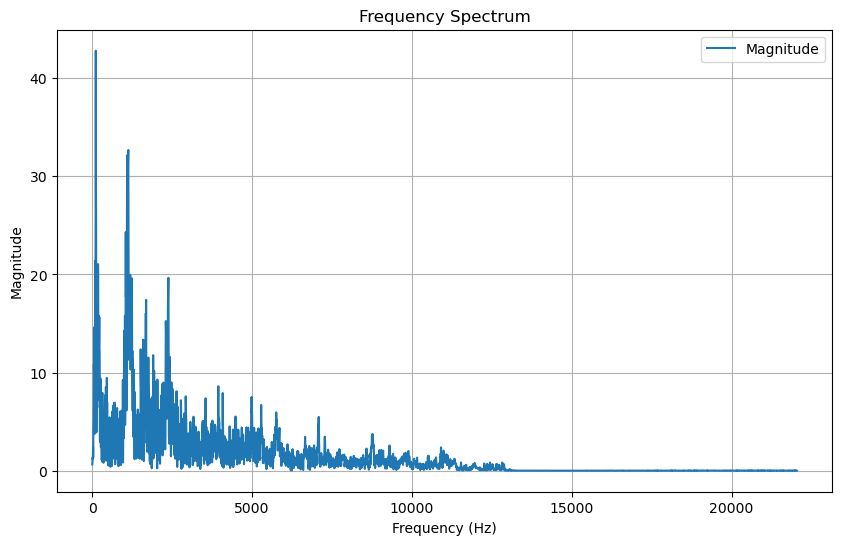

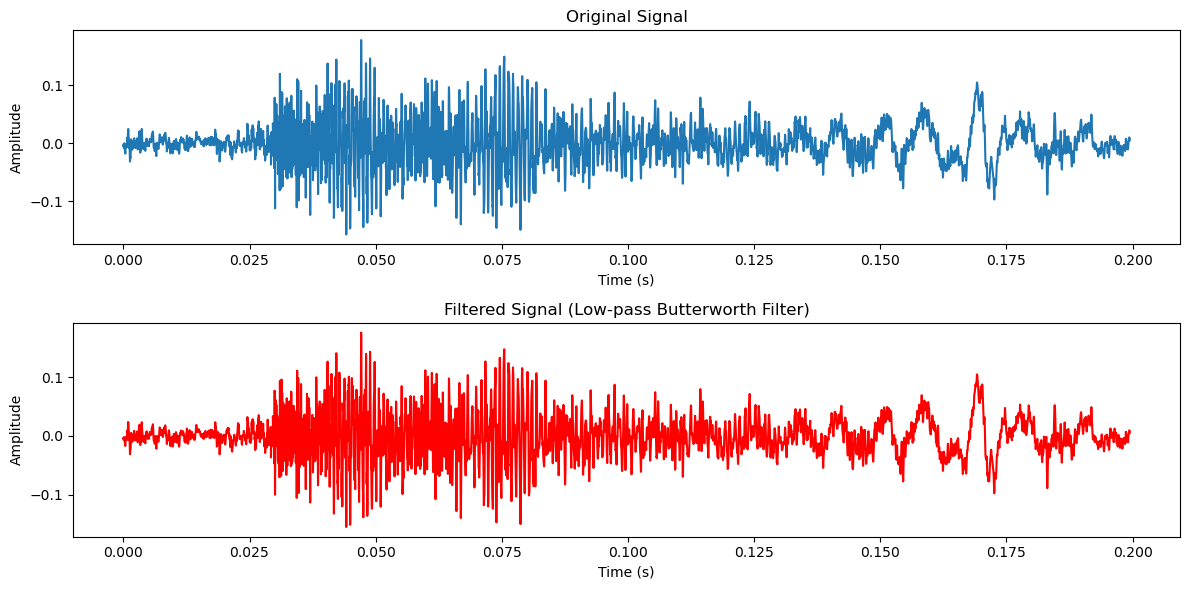

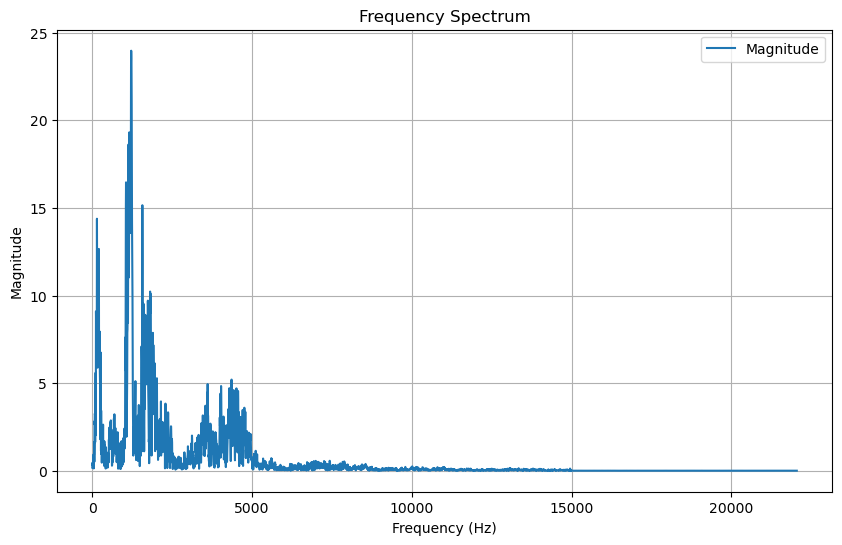

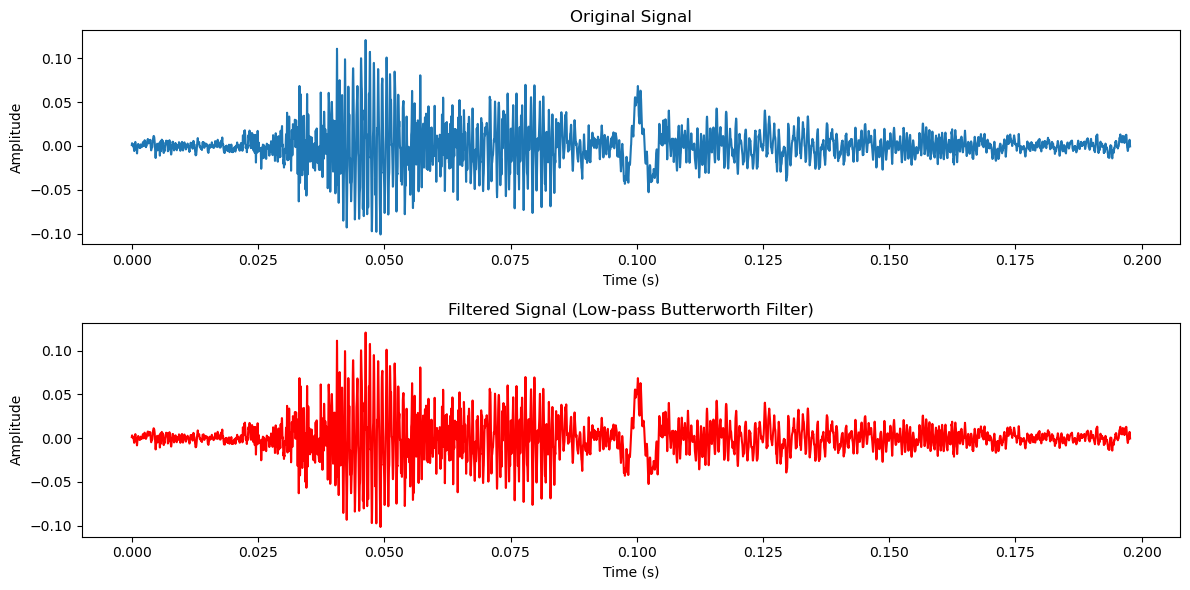

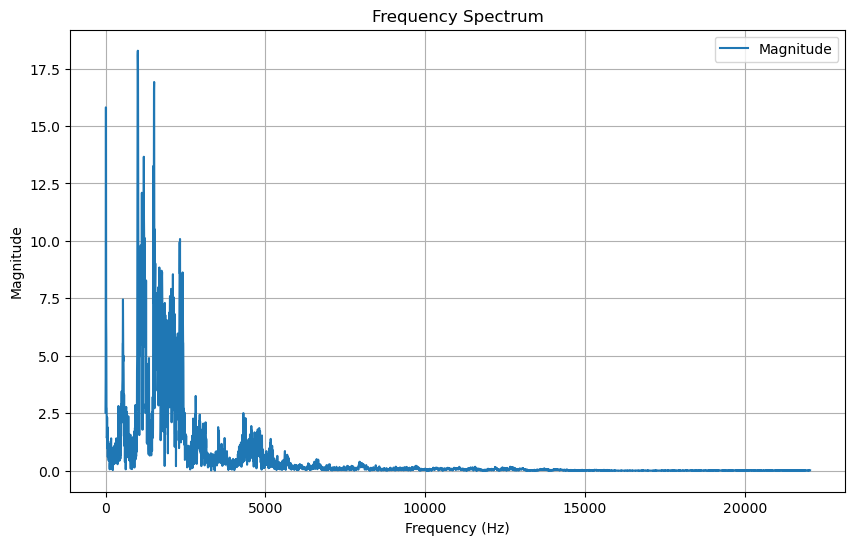

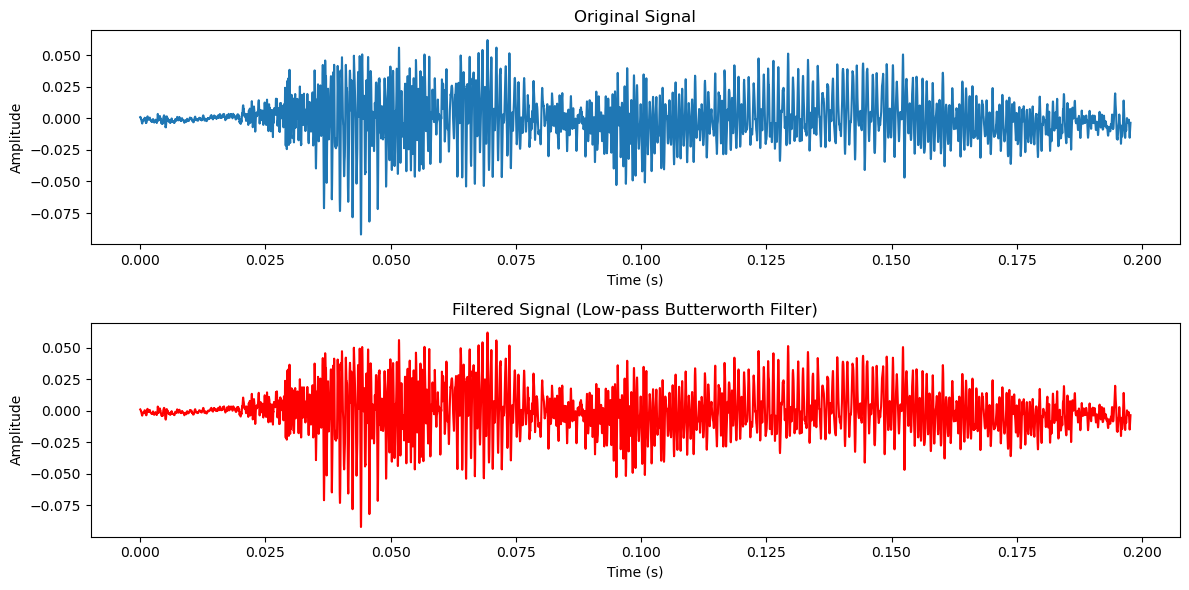

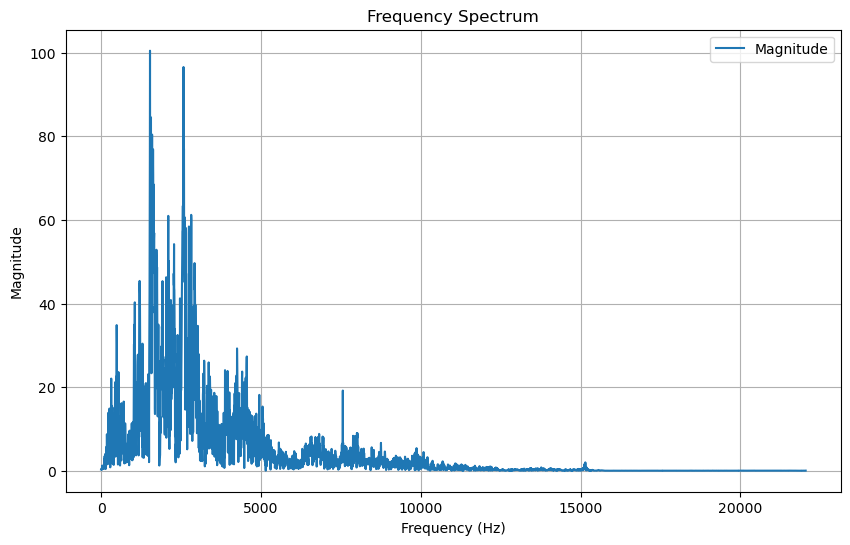

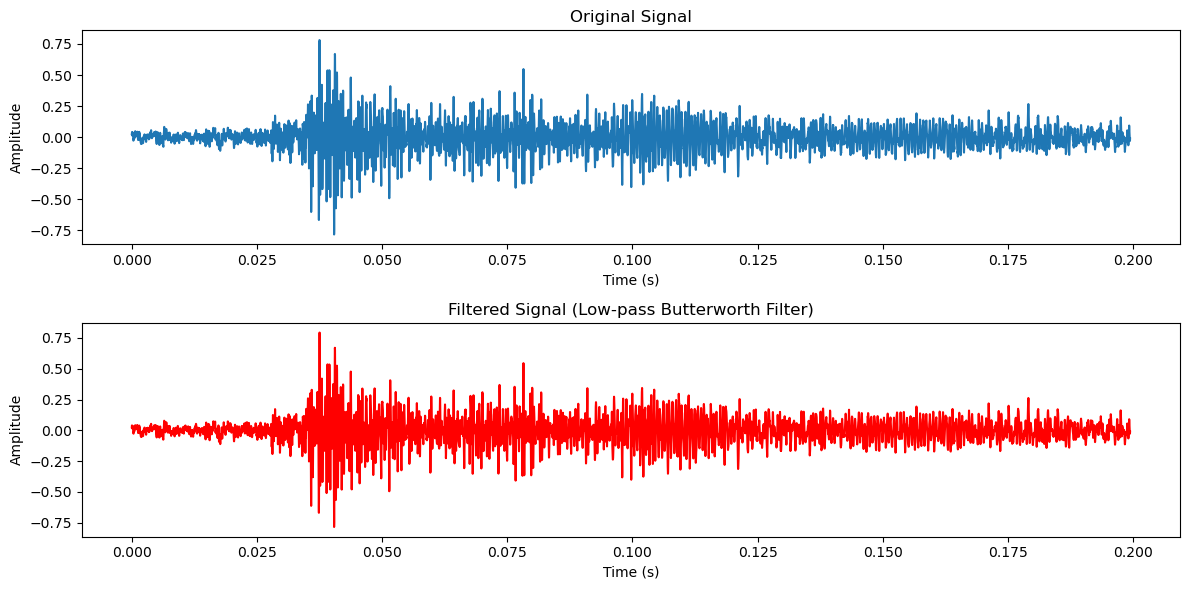

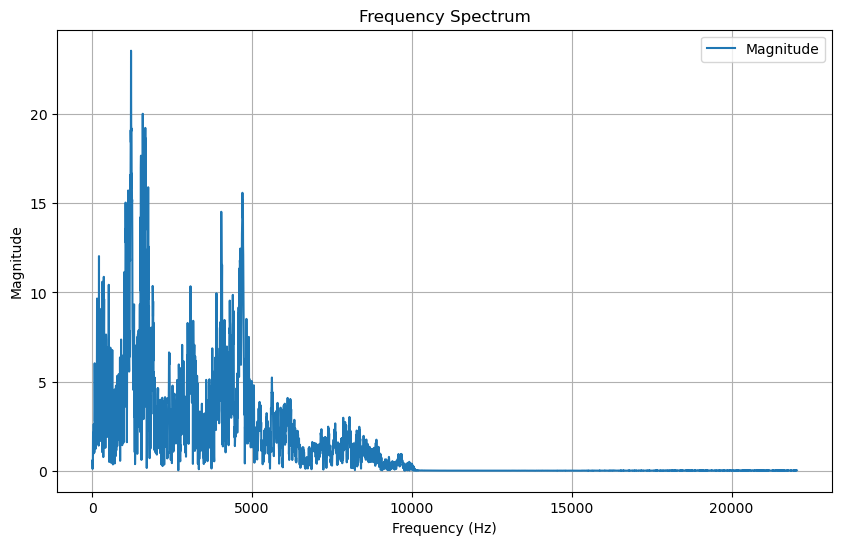

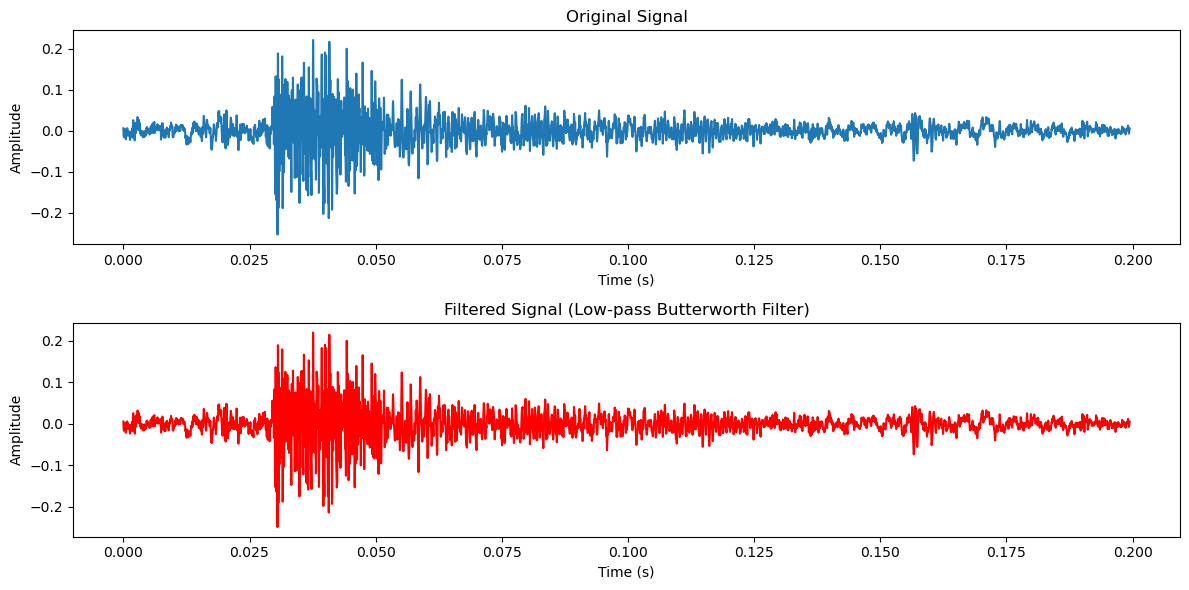

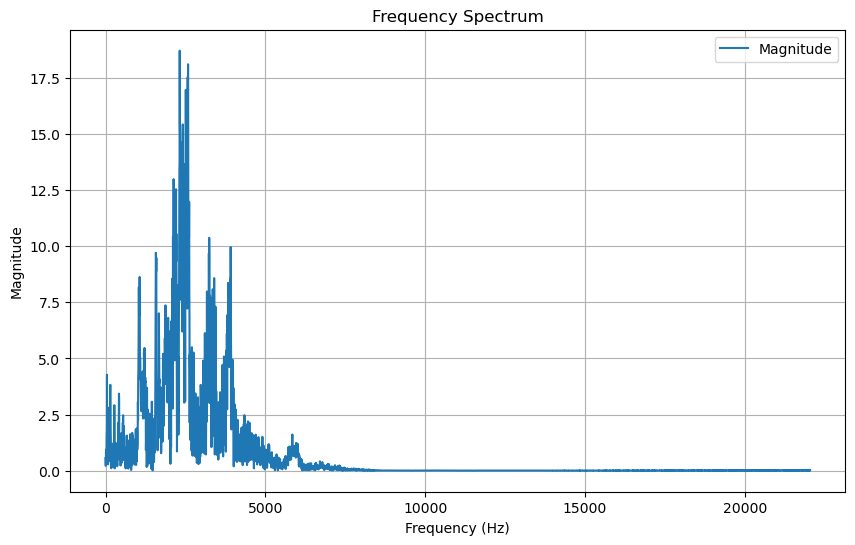

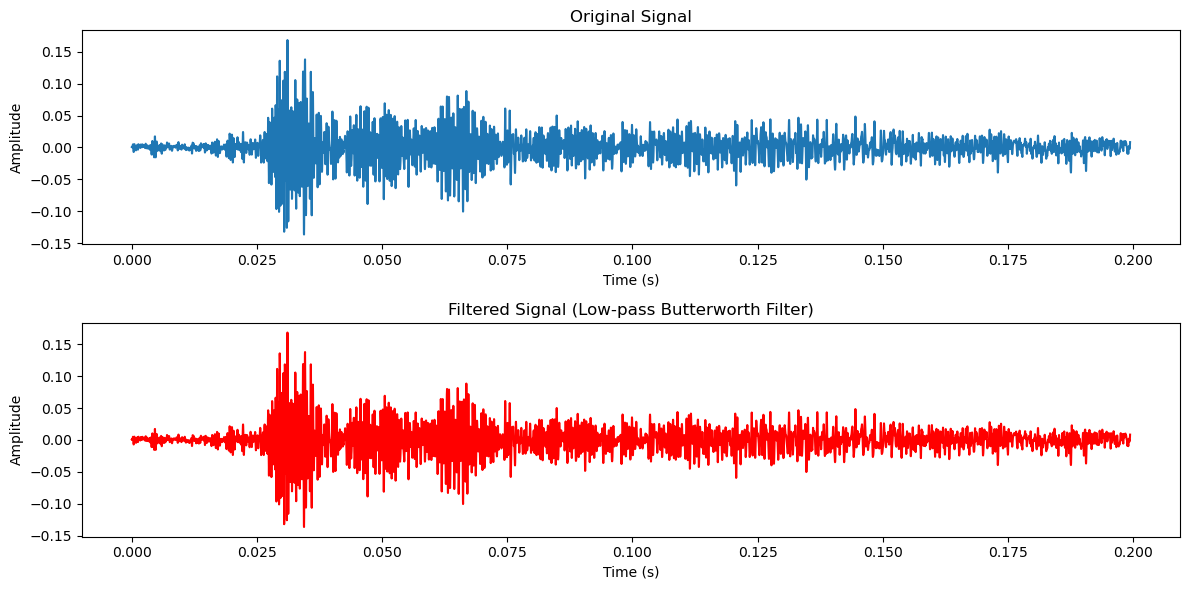

Generated audio files are saved in the 'filtered_echoes' folder.


In [63]:
# Main Script
if __name__ == "__main__":
    # File paths for the 6 audio samples
    audio_files_claps = ["../data/claps/clap-1.wav", "../data/claps/clap-2.wav", "../data/claps/clap-3.wav", "../data/claps/clap-4.wav", "../data/claps/clap-5.wav", "../data/claps/clap-6.wav"]
    audio_files_echoes = ["../data/echoes/echo-1.wav", "../data/echoes/echo-2.wav", "../data/echoes/echo-3.wav", "../data/echoes/echo-4.wav", "../data/echoes/echo-5.wav", "../data/echoes/echo-6.wav"]
    cutoff_frequency=10000

    clap_Analysis(audio_files_claps,cutoff_frequency)
    echo_Analysis(audio_files_echoes,cutoff_frequency)
    


